# Understand Cross-Validation and overfitting

This notebook explains:
+ What is Cross-Validation?
+ What is overfitting?
+ Why Cross-Validation is required?

## What is Cross-Validation?

Cross validation is a step in building a ML model which helps us to ensure that our model fits the data accurately and also ensures that we do not *overfit*.

## What is Overfitting?

To understand overfitting, let's look at the `red wine quality dataset`.

### Import libraries

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics

%matplotlib inline

### Load the dataset

In [8]:
data = pd.read_csv('../Data/1-wine-quality-red.csv')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.shape

(1599, 12)

In [10]:
data['class'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: class, dtype: int64

This dataset consists of six types of quality values i.e. 3-8. We will thus map all quality values from 0 to 5.

In [11]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

In [12]:
data.loc[:,'class'] = data['class'].map(quality_mapping)
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


### Split the data into train and test

In [16]:
# Use sample method with frac=1 to shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

data_train = data.head(1000)

data_test = data.tail(599)

In [17]:
data_train.shape, data_test.shape

((1000, 12), (599, 12))

In [22]:
train_features = data_train.drop('class', axis=1)
train_label = data_train['class']

test_features = data_test.drop('class', axis=1)
test_label = data_test['class']

print(train_features.shape, train_label.shape)
print(test_features.shape, test_label.shape)

(1000, 11) (1000,)
(599, 11) (599,)


### Use DecisionTreeClassifier to train the model

In [23]:
# Initialize the DecisionTreeClassifier with max_depth = 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# Train the model on provided feature
clf.fit(train_features, train_label)

DecisionTreeClassifier(max_depth=3)

In [24]:
# Generate predictions on the training set
train_predictions = clf.predict(train_features)
test_predictions = clf.predict(test_features)

train_accuracy = metrics.accuracy_score(train_label, train_predictions)
test_accuracy = metrics.accuracy_score(test_label, test_predictions)


In [25]:
print(train_accuracy)
print(test_accuracy)

0.591
0.5642737896494157


Let's check for max_depth=7

In [26]:
clf = tree.DecisionTreeClassifier(max_depth=7)

clf.fit(train_features, train_label)

DecisionTreeClassifier(max_depth=7)

In [27]:
train_predictions = clf.predict(train_features)
test_predictions = clf.predict(test_features)

train_accuracy = metrics.accuracy_score(train_label, train_predictions)
test_accuracy = metrics.accuracy_score(test_label, test_predictions)

In [28]:
print(train_accuracy)
print(test_accuracy)

0.766
0.5642737896494157


As we can see that Training accuracy has increased while Test accuracy is same.

Let's plot the graph for max_depth vs Train and test accuracies

In [31]:
train_accuracies = []
test_accuracies = []
for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(train_features, train_label)

    train_predictions = clf.predict(train_features)
    test_predictions = clf.predict(test_features)

    train_accuracy = metrics.accuracy_score(train_label, train_predictions)
    test_accuracy = metrics.accuracy_score(test_label, test_predictions)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


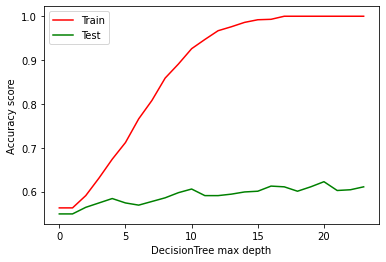

In [33]:
plt.plot(train_accuracies, 'r-', label='Train')
plt.plot(test_accuracies, 'g-', label='Test')
plt.xlabel('DecisionTree max depth')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

In [36]:
max_idx = np.argmax(test_accuracies)
max_idx, test_accuracies[max_idx]

(20, 0.6227045075125208)

We can see that Test accuracy is maximum, 62.27% at max_depth=20 while Train accuracy keeps increasing to almost 100% as max_depth increases. This is called overfitting.

The model fits perfectly on the training set and performs poorly on the testing set. This mean that model will learn the training data well but will not generalize on unseen samples.

Another definition of overfitting would be when the test loss increases as we keep improving training loss. This is very common when it comes to neural networks.